Dataset shape: (10000, 16)

Columns in dataset: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         10000 non-null  object 
 1   BatchId               10000 non-null  object 
 2   AccountId             10000 non-null  object 
 3   SubscriptionId        10000 non-null  object 
 4   CustomerId            10000 non-null  object 
 5   CurrencyCode          10000 non-null  object 
 6   CountryCode           10000 non-null  int64  
 7   ProviderId            10000 non-null  object 
 8   ProductId             10000 non-null  object 
 9   ProductCategory       10000 no

,count,mean,std,min,25%,50%,75%,max,median
CountryCode,10000.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0,256.0
Amount,10000.0,5680.268684,70738.355717,-150000.0,-50.0,1000.0,2000.0,5000000.0,1000.0
Value,10000.0,6529.597000,70686.443941,2.0,100.0,1000.0,3500.0,5000000.0,1000.0
PricingStrategy,10000.0,2.166100,0.650041,0.0,2.0,2.0,2.0,4.0,2.0
FraudResult,10000.0,0.001300,0.036034,0.0,0.0,0.0,0.0,1.0,0.0



Categorical Summary Statistics:


,unique,top,freq
TransactionId,10000,TransactionId_100013,1
BatchId,9902,BatchId_113893,14
AccountId,815,AccountId_4841,3734
SubscriptionId,814,SubscriptionId_3829,3743
CustomerId,857,CustomerId_2477,307
CurrencyCode,1,UGX,10000
ProviderId,6,ProviderId_4,3944
ProductId,20,ProductId_6,3743
ProductCategory,8,financial_services,5118
ChannelId,4,ChannelId_3,5984



Missing Values per Column:


,Missing Count,Missing %
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


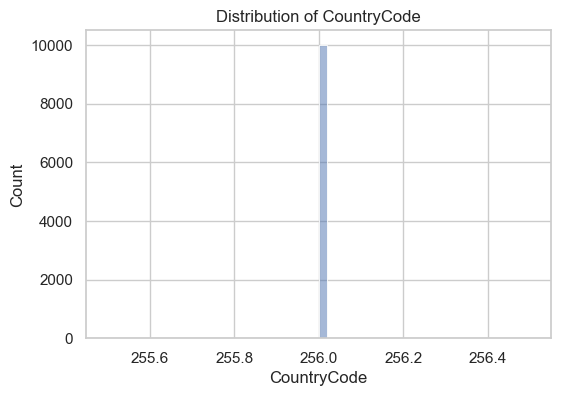

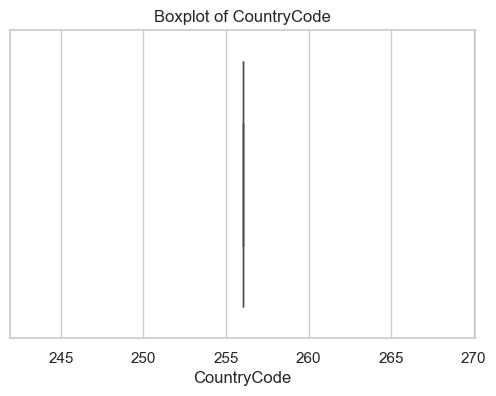

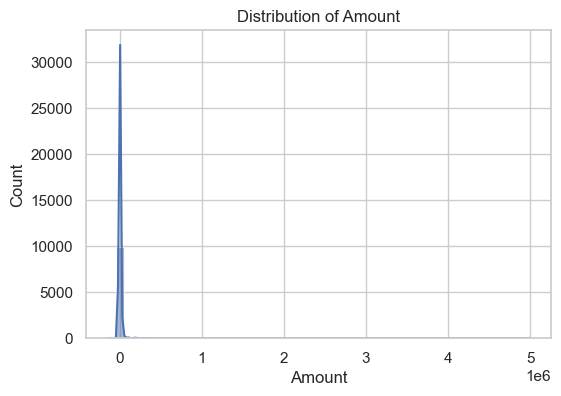

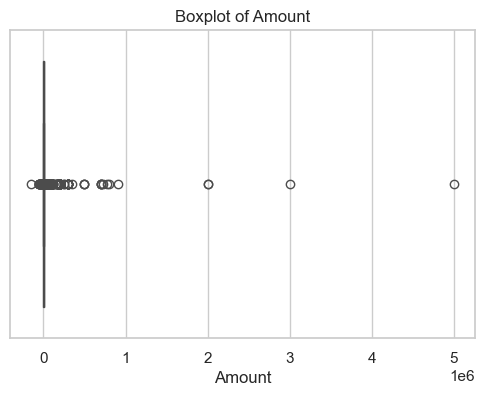

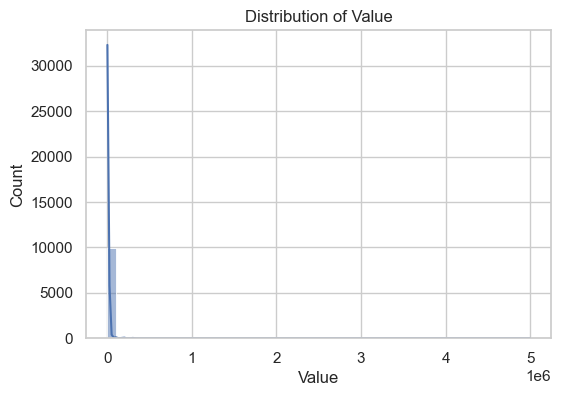

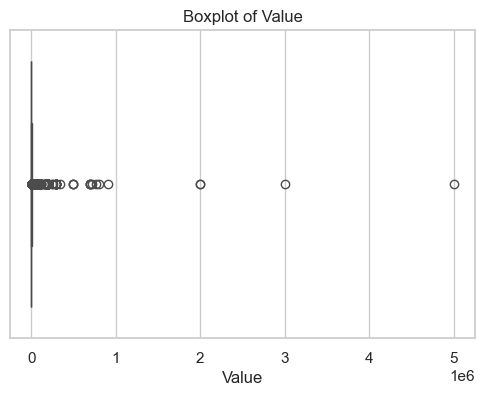

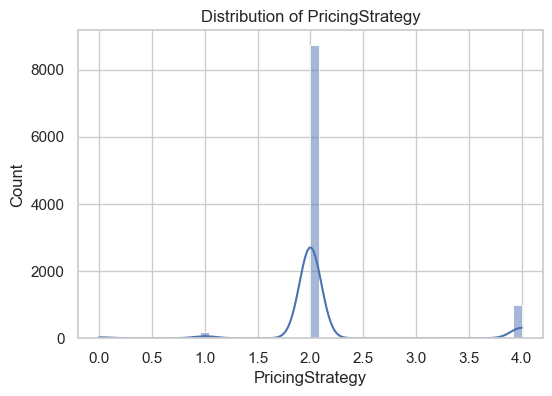

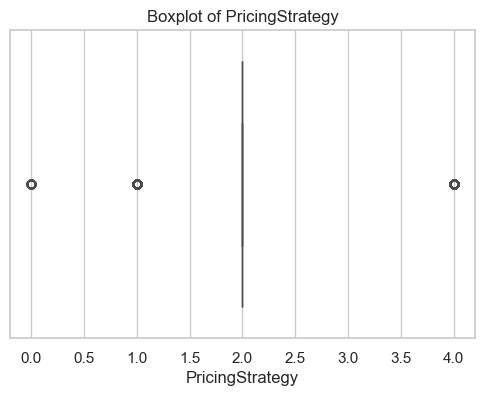

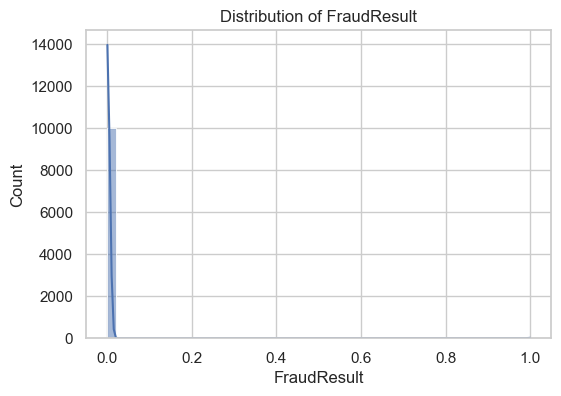

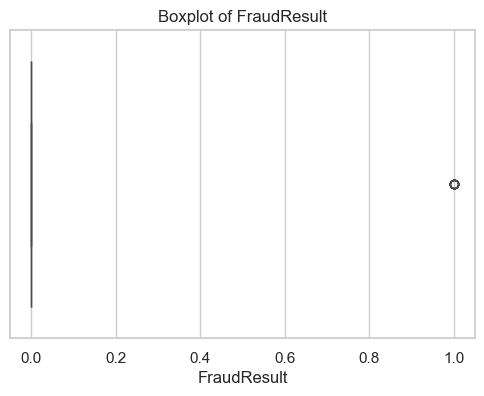

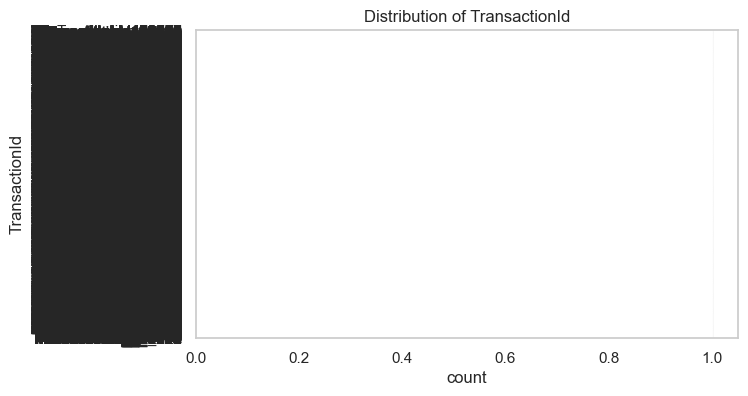

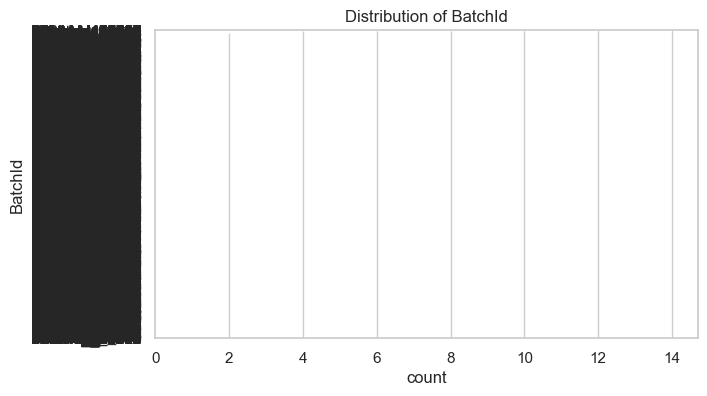

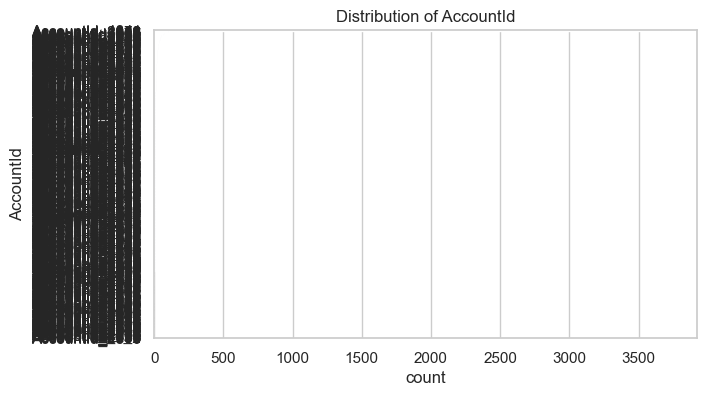

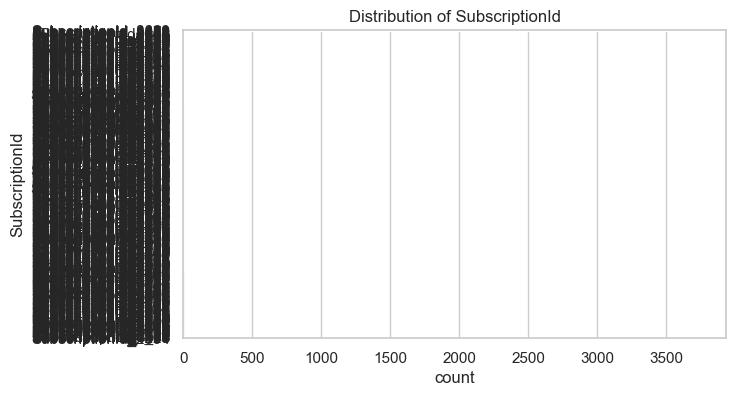

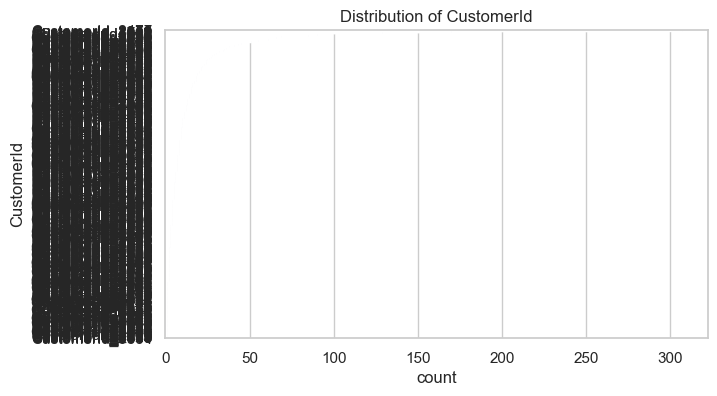

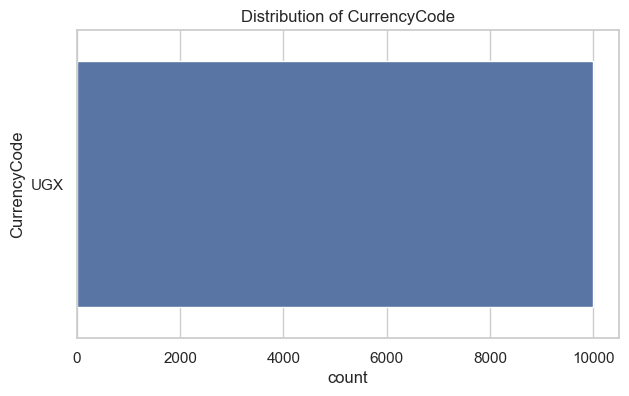

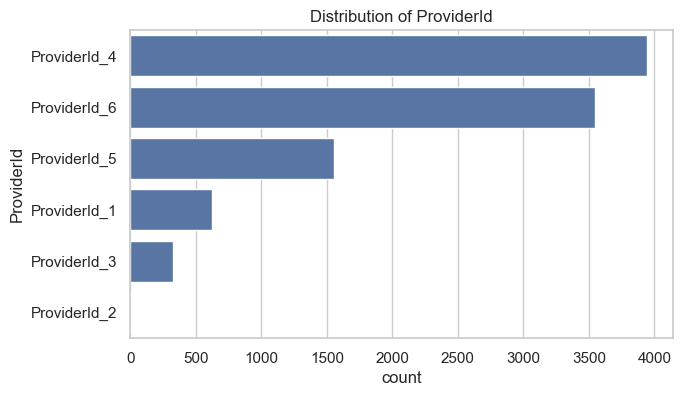

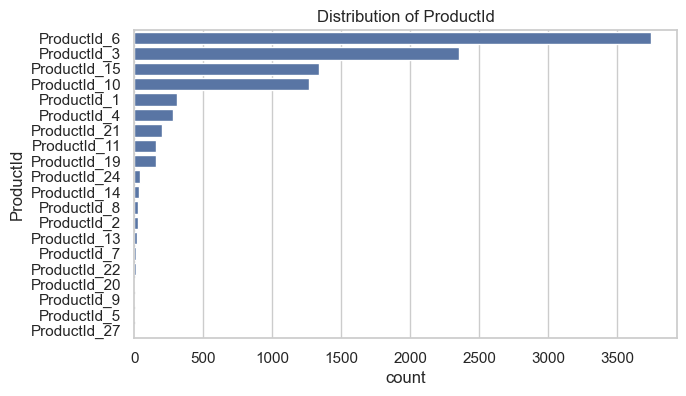

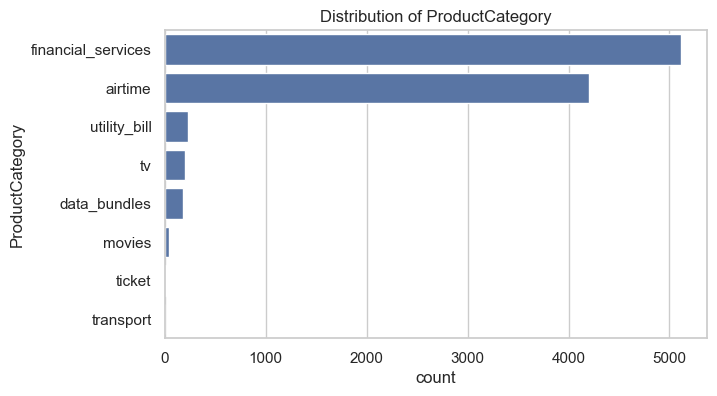

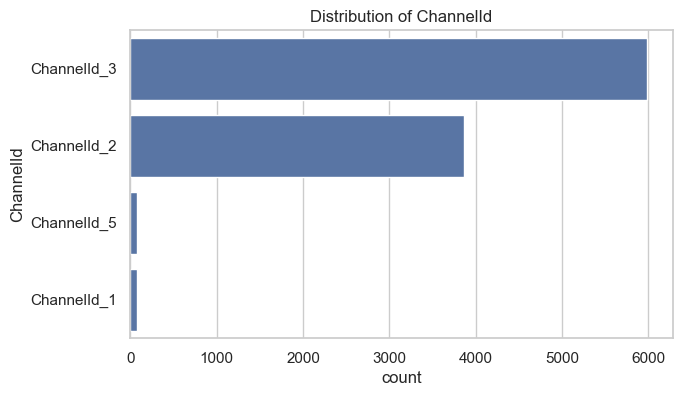

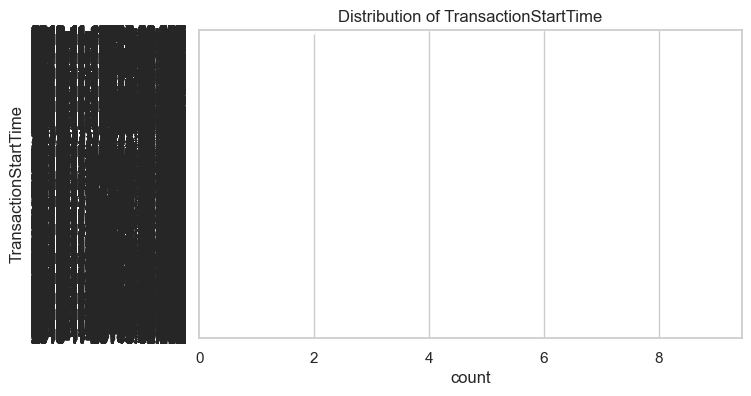

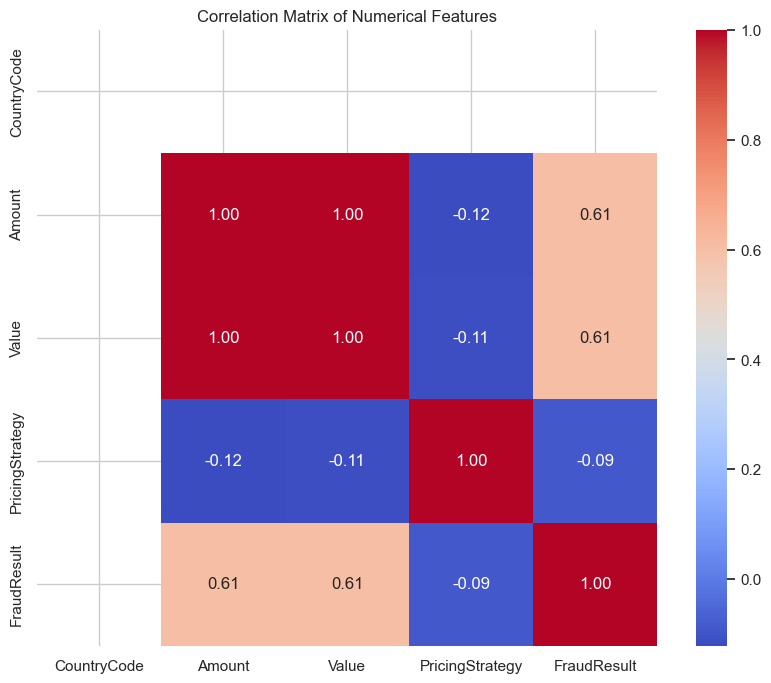

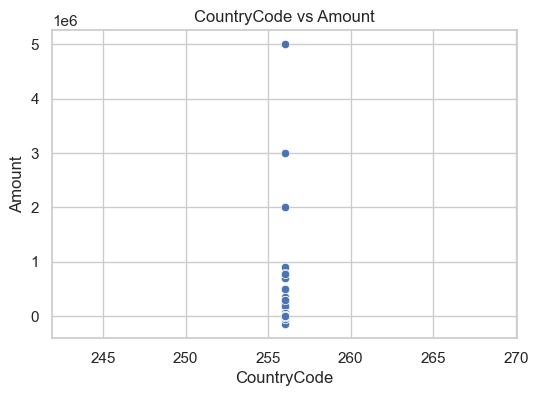

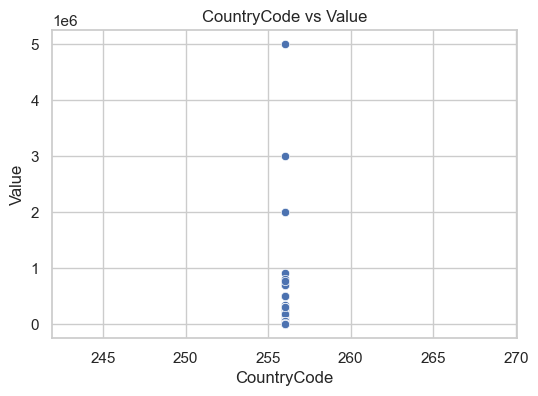

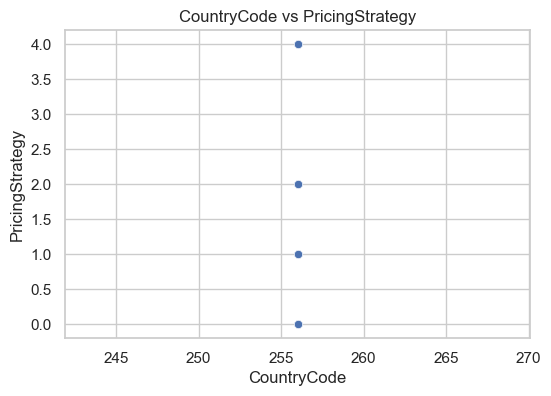

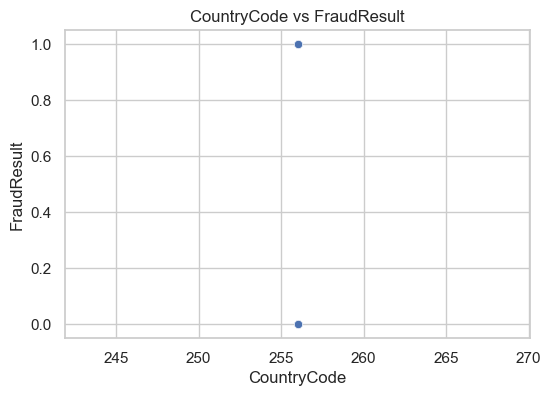

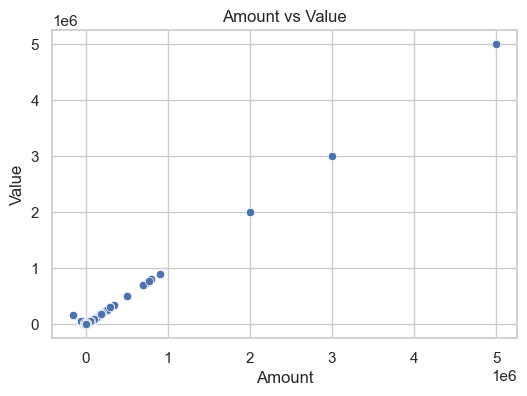

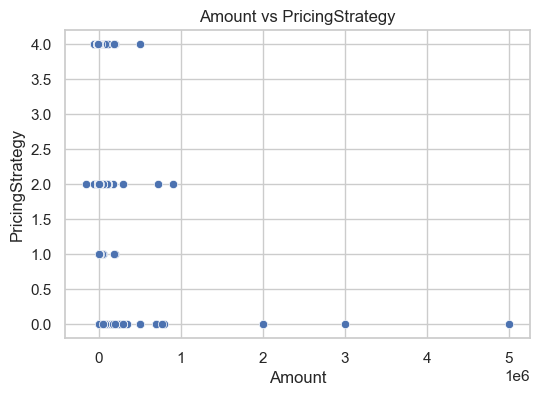

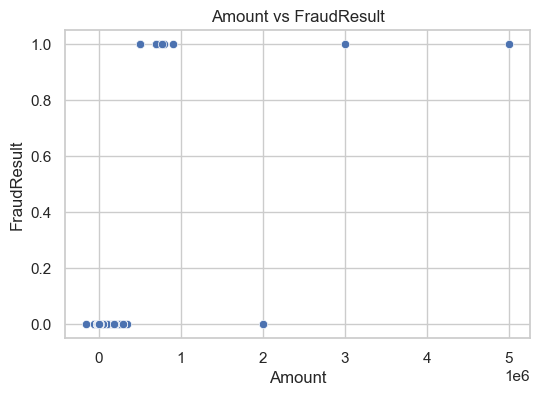

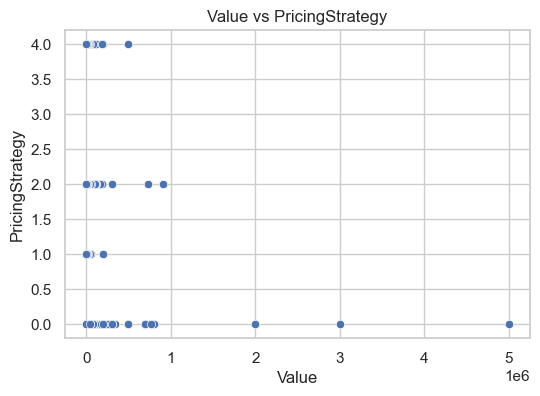

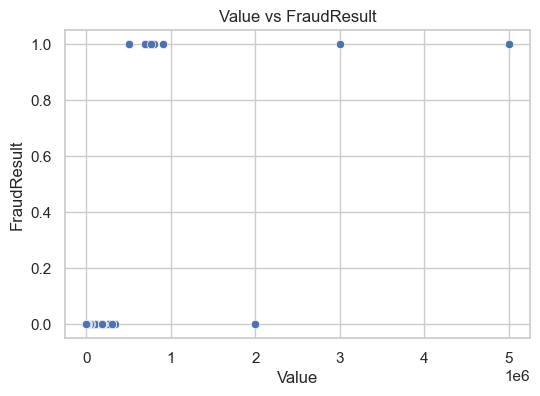

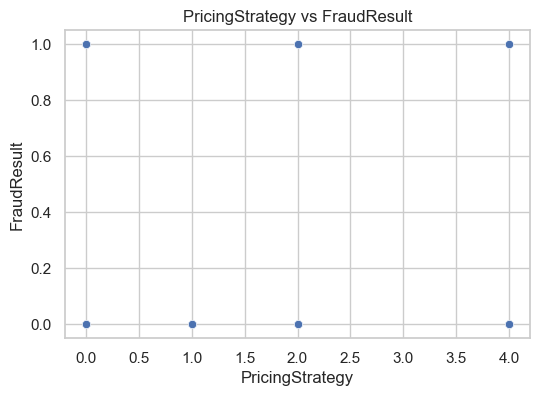


RFM Sample:


,CustomerId,TransactionStartTime,Recency,Frequency,Monetary
0,CustomerId_1,2018-11-21 16:49:14+00:00,7,1,-10000.0
1,CustomerId_10,2018-11-21 16:49:09+00:00,7,1,-10000.0
2,CustomerId_1001,2018-11-16 08:20:39+00:00,13,5,20000.0
3,CustomerId_1002,2018-11-22 19:47:31+00:00,6,4,1900.0
4,CustomerId_1007,2018-11-24 06:35:26+00:00,5,1,28000.0


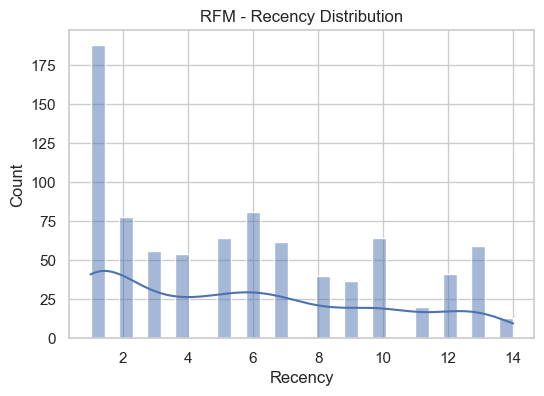

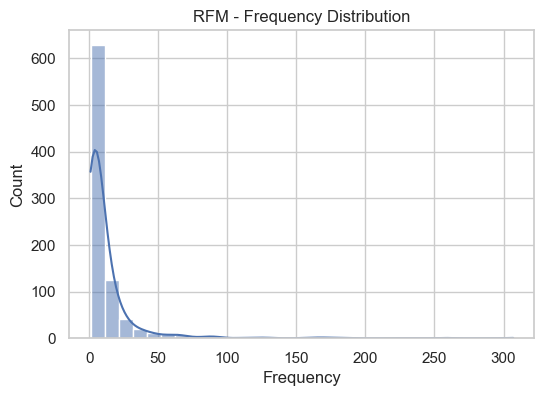

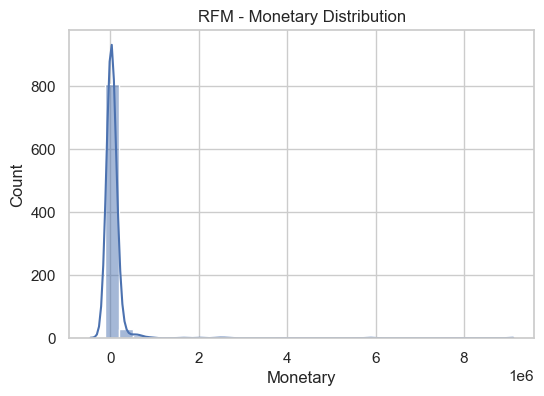

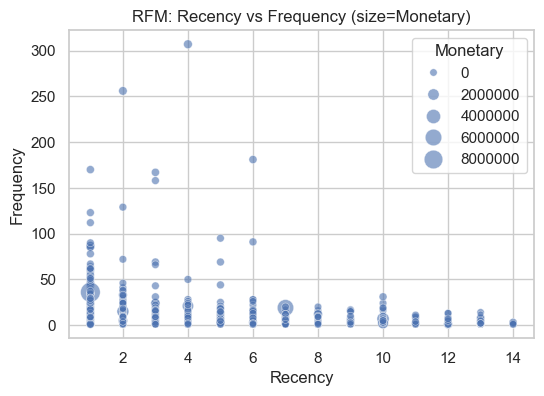

In [1]:
# =========================
# Full Credit Risk EDA Notebook
# =========================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
%matplotlib inline

# Step 2: Load data
df = pd.read_csv('../data/raw/data.csv', nrows=10000)  # Use full dataset for final EDA
print("Dataset shape:", df.shape)

# Step 3: Quick overview
print("\nColumns in dataset:", df.columns.tolist())
print("\nInfo:")
print(df.info())

# Step 4: Summary statistics (numerical)
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
num_summary = df[numerical_cols].describe().T
num_summary['median'] = df[numerical_cols].median()
print("\nNumerical Summary Statistics:")
display(num_summary)

# Step 5: Summary statistics (categorical)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
cat_summary = pd.DataFrame({
    'unique': [df[col].nunique() for col in categorical_cols],
    'top': [df[col].mode()[0] for col in categorical_cols],
    'freq': [df[col].value_counts().max() for col in categorical_cols]
}, index=categorical_cols)
print("\nCategorical Summary Statistics:")
display(cat_summary)

# Step 6: Missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.DataFrame({'Missing Count': missing_values, 'Missing %': missing_percent})
print("\nMissing Values per Column:")
display(missing_table)

# Step 7: Univariate Analysis

# Numerical Features
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Categorical Features
for col in categorical_cols:
    plt.figure(figsize=(7,4))
    sns.countplot(y=df[col], data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

# Step 8: Correlation matrix
plt.figure(figsize=(10,8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Step 9: Scatter plots (bivariate analysis)
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[numerical_cols[i]], y=df[numerical_cols[j]])
        plt.title(f'{numerical_cols[i]} vs {numerical_cols[j]}')
        plt.show()

# Step 10: RFM proxy calculations
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
# Recency
snapshot_date = df['TransactionStartTime'].max() + pd.Timedelta(days=1)
recency_df = df.groupby('CustomerId')['TransactionStartTime'].max().reset_index()
recency_df['Recency'] = (snapshot_date - recency_df['TransactionStartTime']).dt.days

# Frequency
frequency_df = df.groupby('CustomerId')['TransactionId'].count().reset_index().rename(columns={'TransactionId':'Frequency'})

# Monetary
monetary_df = df.groupby('CustomerId')['Amount'].sum().reset_index().rename(columns={'Amount':'Monetary'})

# Merge RFM
rfm = recency_df.merge(frequency_df, on='CustomerId').merge(monetary_df, on='CustomerId')
print("\nRFM Sample:")
display(rfm.head())

# Step 11: RFM distributions
plt.figure(figsize=(6,4))
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title("RFM - Recency Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(rfm['Frequency'], bins=30, kde=True)
plt.title("RFM - Frequency Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(rfm['Monetary'], bins=30, kde=True)
plt.title("RFM - Monetary Distribution")
plt.show()

# Step 12: Scatter plot of RFM (Recency vs Frequency, colored by Monetary)
plt.figure(figsize=(6,4))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', size='Monetary', sizes=(20,200), alpha=0.6)
plt.title("RFM: Recency vs Frequency (size=Monetary)")
plt.show()


# Step 11: Key Insights (Markdown cell recommended in notebook)
## Key Insights
1. Amount and Value distributions are skewed; few extreme transactions exist.
2. CountryCode and ProductCategory distributions are uneven; some categories dominate.
3. Missing values detected in PricingStrategy and ChannelId; imputation required.
4. Refund transactions appear as negative Amounts; may need special handling.
5. Amount and Value are strongly correlated; consider feature redundancy.
6. RFM features (Recency, Frequency, Monetary) can be used as a proxy for credit risk.